# Project: Finding Donors for CharityML
## Supervised Learning

## About the project
In this project, I will employ several supervised algorithms of my choice to accurately model individuals' income using data collected from the 1994 U.S. Census. I will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. my goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations. Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with. While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features.




## About the Data
The dataset for this project originates from the UCI Machine Learning Repository. The datset was donated by Ron Kohavi and Barry Becker, after being published in the article "Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid". You can find the article by Ron Kohavi online. The data we investigate here consists of small changes to the original dataset, such as removing the 'fnlwgt' feature and records with missing or ill-formatted entries.

## 1. Import libraries 

In [1]:
## Load the google drive into the co-lab
from google.colab import drive
drive.mount('/content/drive')

## Import libraries
import numpy as np                  # https://numpy.org/doc/stable/user/whatisnumpy.html
import pandas as pd                 # https://www.activestate.com/resources/quick-reads/what-is-pandas-in-python-everything-you-need-to-know/
import matplotlib.pyplot as plt     # https://www.activestate.com/resources/quick-reads/what-is-matplotlib-in-python-how-to-use-it-for-plotting/
import seaborn as sns               # https://www.analyticsvidhya.com/blog/2019/09/comprehensive-data-visualization-guide-seaborn-python/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data

In [2]:
# The data in csv file, we will load it into the notebook using Pandas
data = pd.read_csv('census.csv')
data.head(3)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K


## 2. Data Exploration

In [3]:
# Total number of records
n_records = data.shape[0]

# Number of records where individual's income is more than $50,000
n_greater_50k = data[data['income'] == '>50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = data[data['income'] == '<=50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k / n_records) * 100

# Print the results
print(f"Total number of records: {n_records}")
print(f"Individuals making more than $50,000: {n_greater_50k}")
print(f"Individuals making at most $50,000: {n_at_most_50k}")
print(f"Percentage of individuals making more than $50,000: {greater_percent}%")

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


### Hint 1

*   As we see that our data have 45222 record, and i think it's size is look good for the goal of project

*   The Percentage of individuals making more than $50,000 is 24% so we are dealing with imbalanced data here.


In [4]:
# Look at some informations like Missingness, Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


### Hint 2

*   We have alot of Object datatype so we should encoding them before modeling.
*   The target variable is object also we should encode it to 0 and 1 before modeling.
*   we didn't have missing values in our data, Pretty Nice!

In [5]:
# Look at the unique values in each feature.
def unique():
    unique_values = {}
    for col in data.columns:
        if data[col].dtype == 'object':
            unique_values[col] = pd.unique(data[col].values)
    return unique_values

unique()

{'education_level': array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
        ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
        ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
        ' 12th', ' 1st-4th'], dtype=object),
 'income': array(['<=50K', '>50K'], dtype=object),
 'marital-status': array([' Never-married', ' Married-civ-spouse', ' Divorced',
        ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
        ' Widowed'], dtype=object),
 'native-country': array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
        ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
        ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
        ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
        ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
        ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
        ' Outlying-US(Guam-USVI-etc)', ' Scotland

### Categorical Features

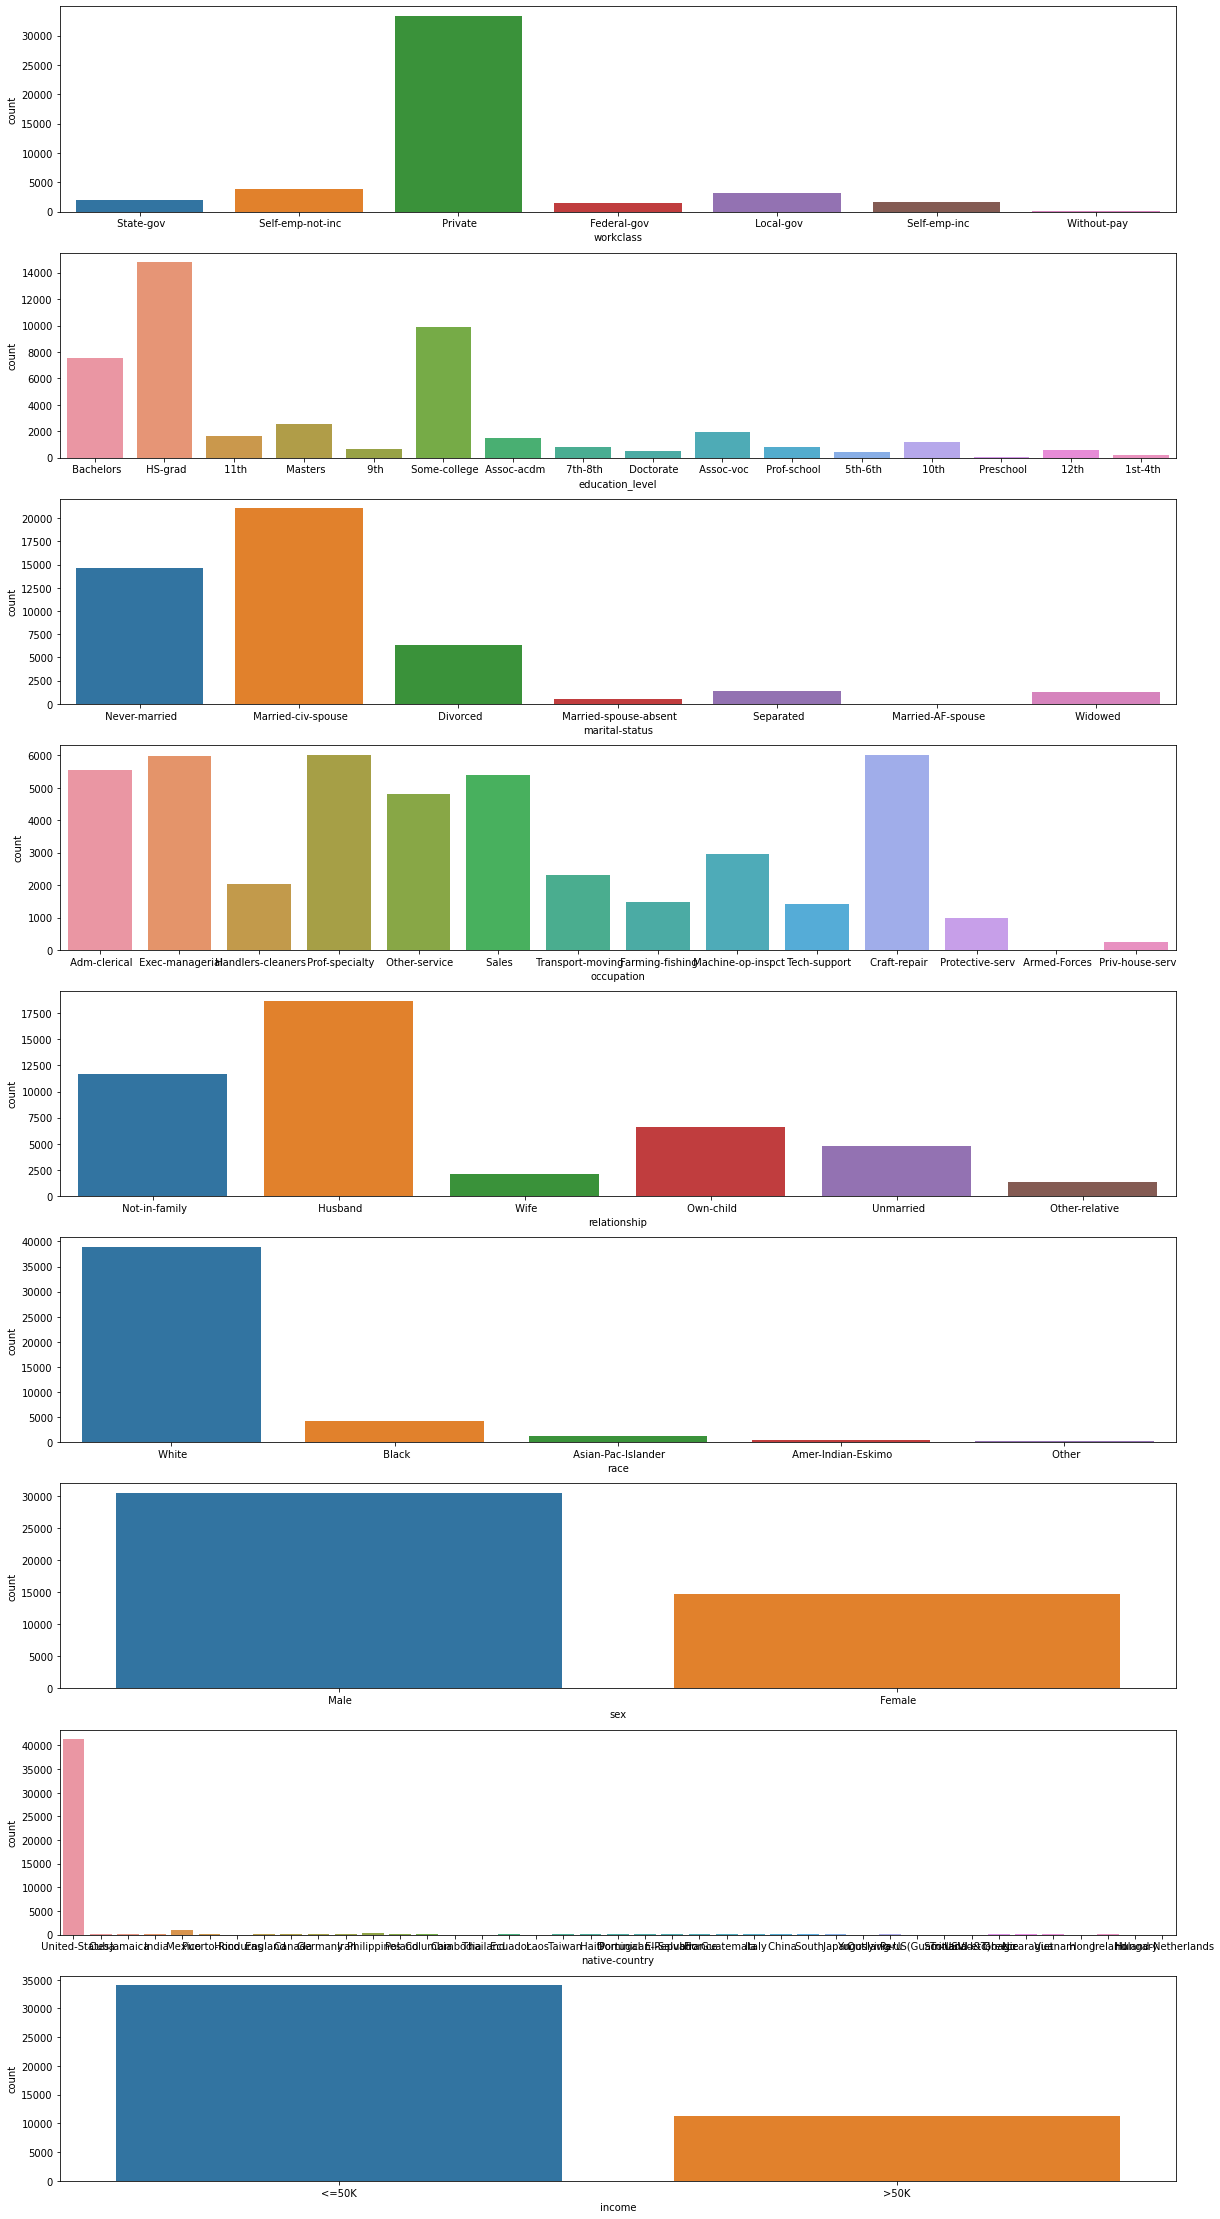

In [6]:
## It's time to take a look to the distribution of the categorical variables.
categ_cols = [col for col in data.columns if data[col].dtype == 'object']
fig, ax = plt.subplots(9, 1, figsize=(20,40))
idx = 0
for i in range(len(categ_cols)):
    sns.countplot(x = categ_cols[idx], data = data, ax = ax[i])
    idx+=1
plt.show()

### Numerical features

In [7]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


#### **Hint 1**
It seems that Capital-gain and capital-loss have Extreme Values, also on a High Scale.

<Figure size 1440x1440 with 0 Axes>

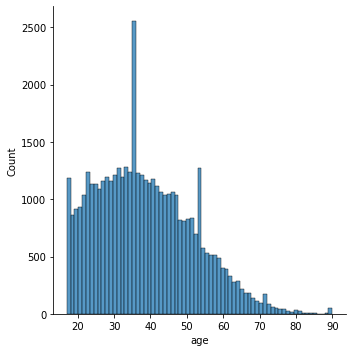

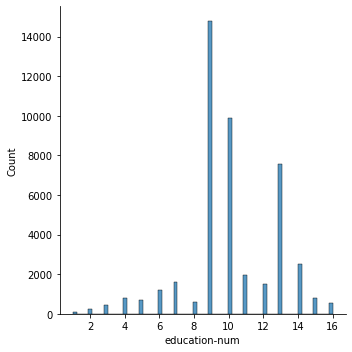

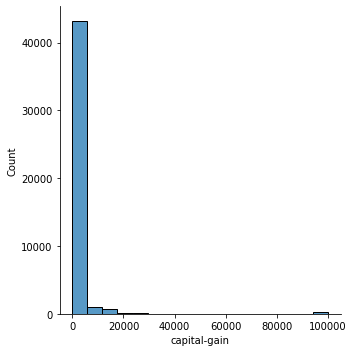

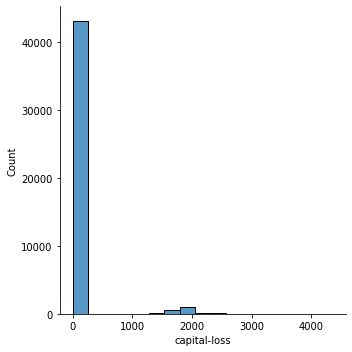

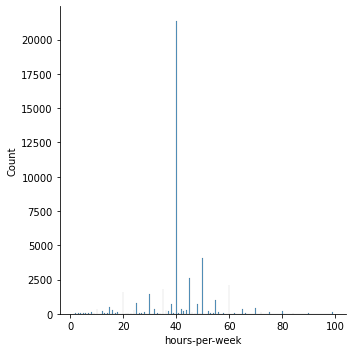

In [8]:
# Look at the distribution of the numerical variables
num_cols = [col for col in data.columns if data[col].dtype != 'object']

plt.figure(figsize=(20,20))
for i in range(len(num_cols)):
    sns.displot(x = num_cols[i], data = data)
plt.show()

#### Hint 2 

Looking at the graph above, all the numerical feature is looks good except capital-gain and capital-loss, affected with Outliers and the values on High Scale.

## Data Preparation

Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as preprocessing. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted

Since the algorithms can be sensitive to Skewed distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: 'capital-gain' and 'capital-loss'

In [9]:
# take a copy from the original data
census = data.copy(deep=True)

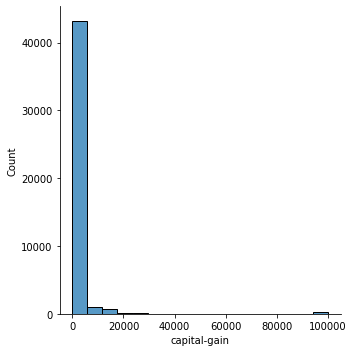

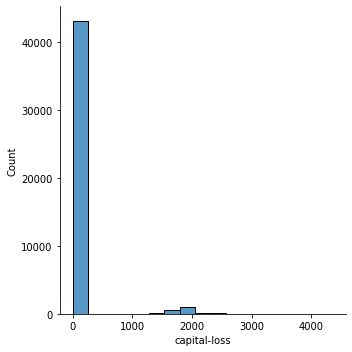

In [10]:
# Visualize skewed continuous features of original data
for col in ['capital-gain', 'capital-loss']:
    sns.displot(x = census[col], data = census)
plt.show()

### Hint 1
For highly-skewed feature distributions such as 'capital-gain' and 'capital-loss', it is common practice to apply a logarithmic transformation on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers.

In [11]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
census[skewed] = census[skewed].apply(lambda x: np.log(x + 1))

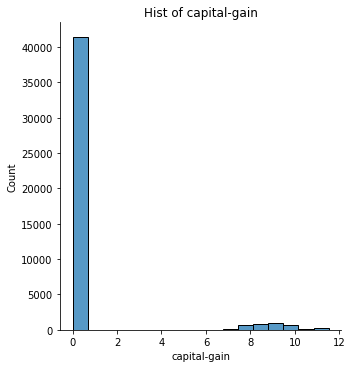

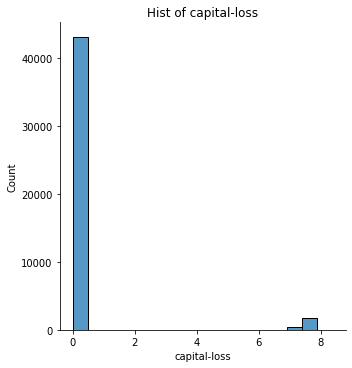

In [12]:
# Visualize after transformation
for col in ['capital-gain', 'capital-loss']:
    sns.displot(x = census[col], data = census)

    plt.title(f'Hist of {col}', fontsize=12)
plt.show()